In [ ]:
!pip install -U langchain-community -q
!pip install langchain_huggingface -q
!pip install -q pypdf
!pip install langchain-chroma -q
!pip install langchain_groq -q
!pip install sentence-transformers -q
!pip install gradio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.7 MB/s eta 0:00:0

#### load any pdf you want

In [ ]:
from langchain.document_loaders import PyPDFLoader
path = "/content/Mohamed_ARBI_Nsibi_RESUME.pdf"
loader = PyPDFLoader(path)
pages= loader.load_and_split()



In [ ]:
pages[0].page_content

'Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\n♂¶obile+216 29 051 246 /envel⌢pemohammedarbi.nsibi@supcom.tn /h⌢meAriana, Tunis\n/linkedinin/mohammed-arbi-nsibi /githubgithub.com/Goodnight77\nPROFILE\nAs a final-year engineering student, former lead and currently the mentor of the Google Developer Group on Campus\nSUP’COM, I am passionate about Machine Learning, Deep Learning and Generative AI. I am actively seeking opportunities\nto expand my skills and connect with professionals in these fields.\nEDUCATION\nICT Engineer’s degree Higher school of communication (SUP’COM) 2022-2024\n• Principal coursework : Probability, Statistical inference, Algorithmic Foundations of Optimization, Cloud, Big Data,\nData science, Artificial intelligence.\nDegree in Physics and Chemistry Preparatory Institute For Engineering Studies of TUNIS (IPEIT) 2020-2022\n• Ranked 70/1400 in the national entrance exam for engineering schools.\nPROFESSIONAL EXPERIENCE\nAI Intern, Omicrone Tunis, Tunisia 07/

In [ ]:
len(pages)

2

### Data ingestion

#### Character Text Splitter
###### offer 2 customization: size of each chunk and overlap between chunks => manageable segments and maintaining semantic continuity across them
[CharacterTextSplitter](https://api.python.langchain.com/en/latest/text_splitters/character/langchain_text_splitters.character.CharacterTextSplitter.html)

In [ ]:
text = "this is the text i want to chunk. it is just an example of text for this section"

In [ ]:
chunks= []
chunk_size= 30
for i in range(0, len(text),chunk_size):
  chunk= text[i: i+chunk_size]
  chunks.append(chunk)
chunks



['this is the text i want to chu',
 'nk. it is just an example of t',
 'ext for this section']

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    chunk_size=30,
    chunk_overlap=4,
    separator =''
    )

text_splitter.create_documents([text]) # expect list output document object with metadata


[Document(metadata={}, page_content='this is the text i want to chu'),
 Document(metadata={}, page_content='chunk. it is just an example'),
 Document(metadata={}, page_content='ple of text for this section')]

In [ ]:
text_splitter = CharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20 ,
    separator =''
    )

text_char_splitter= text_splitter.split_documents(pages)
text_char_splitter[0]

Document(metadata={'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf', 'page': 0}, page_content='Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\n♂¶obile+216 29 051 246 /envel⌢pemohammedarbi.nsibi@supcom.tn /h⌢meAriana, Tunis\n/linkedinin/mohammed-arbi-nsibi /githubgithub.com/Goodnight77\nPROF')

In [ ]:
text_char_splitter[0].page_content

'Mohamed Arbi Nsibi\nICT Engineering Student At SUP’COM\n♂¶obile+216 29 051 246 /envel⌢pemohammedarbi.nsibi@supcom.tn /h⌢meAriana, Tunis\n/linkedinin/mohammed-arbi-nsibi /githubgithub.com/Goodnight77\nPROF'

In [ ]:
len(text_char_splitter)

32

[chunk viz](https://chunkviz.up.railway.app/)

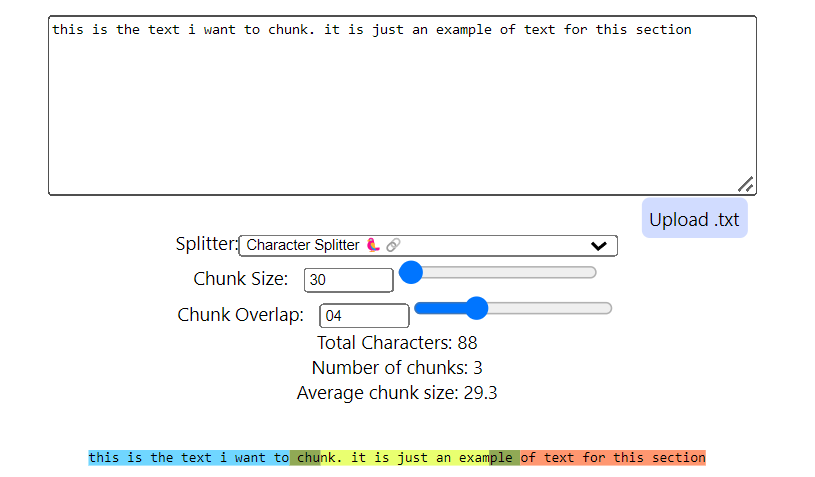

#### Recursive Character Text Splitter
###### look at physical structure of text
###### chunk based on predifined list of characters default = ["\n\n", "\n", " "] parag, senteneces , words... at first it divide text using two newline characters if chunks more extensive than desired splitter tries using single newline and 1 space and so on until size is attained

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=60,
    chunk_overlap=0, # default 20
    length_function=len, # count length of chunks, len counts number of character
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)

text = """Now is the time to stop and enjoy the view! This time of year,
nature's beauty is on full display. It can be hard to capture your love
for the outdoors in a short message, but these nature quotes can help!
Share these words with your friends on social media, or jot them down in
your journal for future reflection. Whether you're a fan of the beach, the mountains,
or your back porch, nature is worth celebrating. If you're looking for the perfect words
 to caption your Instagram posts, many of these quotes will double as nature Instagram captions."""
docs = text_splitter.create_documents([text])
docs

[Document(metadata={}, page_content='Now is the time to stop and enjoy the view! This time of'),
 Document(metadata={}, page_content='year,'),
 Document(metadata={}, page_content="nature's beauty is on full display. It can be hard to"),
 Document(metadata={}, page_content='capture your love'),
 Document(metadata={}, page_content='for the outdoors in a short message, but these nature'),
 Document(metadata={}, page_content='quotes can help!'),
 Document(metadata={}, page_content='Share these words with your friends on social media, or jot'),
 Document(metadata={}, page_content='them down in'),
 Document(metadata={}, page_content="your journal for future reflection. Whether you're a fan of"),
 Document(metadata={}, page_content='the beach, the mountains,'),
 Document(metadata={}, page_content="or your back porch, nature is worth celebrating. If you're"),
 Document(metadata={}, page_content='looking for the perfect words'),
 Document(metadata={}, page_content='to caption your Instagram pos

#### and others like : NLTK text splitter , Spacy text splitter , markdown text splitter , token text splitter,...

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter =RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=20, # default 20
    length_function=len, # count length of chunks, len counts number of character
    # set token counter could be + when working with models with token limits # exple GPT3 4096token/request
)
text_recu_splitter = text_splitter.split_documents(pages)
text_recu_splitter[3].page_content

'EDUCATION\nICT Engineer’s degree Higher school of communication (SUP’COM) 2022-2024'

In [ ]:
len(text_recu_splitter)

41

In [ ]:
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")





<ipython-input-20-9b9fc9c92a1c>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### vector store

In [ ]:
from langchain_chroma import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

vector_store = Chroma.from_documents(text_recu_splitter, embedding_model )

In [ ]:
from langchain.vectorstores import Chroma
db = Chroma(
    collection_name="workshop_rag",
    embedding_function=embedding_model,
    persist_directory="/content/chroma_langchain_db",
)

<ipython-input-23-1c14f4883d79>:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  db = Chroma(


In [ ]:
from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="hello my name is arbi a student at supcom and now i am hosting a rag workshop  ",
    metadata={"source": "arbi"},
    id=1,
)

document_2 = Document(
    page_content="sahar is a student at supcom ",
    metadata={"source": "sahar"},
    id=2,
)

document_3 = Document(
    page_content="siwar is a teacher who teach arbi ",
    metadata={"source": "siwar"},
    id=3,
)

documents = [
    document_1,
    document_2,
    document_3,
    ]
uuids = [str(uuid4()) for _ in range(len(documents))]
db.add_documents(documents=documents, ids=uuids)




['76ec9c31-e2b2-44a5-a2a2-ae118c5ed09c',
 'a62b3573-a80e-43e5-b80e-a13b86dd51f1',
 'ec465e4b-509c-4025-8e7b-27443606eb3c']

In [ ]:

results = db.similarity_search("who is arbi", k = 2)
print(results)

[Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop  ')]


In [ ]:
results = db.similarity_search_with_score("who is arbi", k = 2)
print(results)

[(Document(metadata={'source': 'siwar'}, page_content='siwar is a teacher who teach arbi '), 0.8376446661808539), (Document(metadata={'source': 'arbi'}, page_content='hello my name is arbi a student at supcom and now i am hosting a rag workshop  '), 1.5469710975455044)]


In [ ]:
results = vector_store.similarity_search_with_score("what supcom", k = 2)
print(results)

[(Document(metadata={'page': 1, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='Mentor of Google Developer Group on campus SUP’COM and ISAMM 2024/2025\n• Guided the leadership team with strategic advice, leveraging my experience as a former lead. Supported event planning and'), 1.4430683851242065), (Document(metadata={'page': 0, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='EDUCATION\nICT Engineer’s degree Higher school of communication (SUP’COM) 2022-2024'), 1.5230478048324585)]


In [ ]:
# query it
query= "what is supcom?"
results = vector_store.similarity_search(query)
results

[Document(metadata={'page': 1, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='Mentor of Google Developer Group on campus SUP’COM and ISAMM 2024/2025\n• Guided the leadership team with strategic advice, leveraging my experience as a former lead. Supported event planning and'),
 Document(metadata={'page': 1, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='Devfest Hackathon Organizer and Mentor, Hosted by GDG Carthage, focused on Responsible AI 02/11/2024\nCo-organizer in Google Developer Groups of Carthage, 2024/2025'),
 Document(metadata={'page': 0, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='EDUCATION\nICT Engineer’s degree Higher school of communication (SUP’COM) 2022-2024'),
 Document(metadata={'page': 1, 'source': '/content/Mohamed_ARBI_Nsibi_RESUME.pdf'}, page_content='fostered a collaborative learning environment.\nLead of Google Developer Student Clubs (GDSC), SUP’COM 2023/2024')]

In [ ]:
from langchain import PromptTemplate

# write a prompt for a customer support chatbot that answer questions using infos extracted from our db

template = """ you are an exceptional support chatbot that gently answer questions based on my resume and you will speak on my behalf.

you know the following context information
{chunks_formatted}
answer the following question from a customer. use only information from the previous context information .
do not invent stuff.
Question : {query}
Answer : """

prompt = PromptTemplate(
    input_variables =["chunks_formatted","query" ],
    template = template
)


In [ ]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')

In [ ]:
from langchain_groq import ChatGroq
#full pipeline
query = "what all the internships did you do ?"
# retreive relevant chunks
docs = vector_store.similarity_search(query)
retreived_docs = [doc.page_content for doc in docs]

chunks_formatted = "\n\n".join(retreived_docs)
# format the prompt

prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)




# generate answer
# Initialize the model
llm = ChatGroq(
    temperature=0,
    model= "llama-3.3-70b-versatile",#"llama-3.1-70b-versatile", #"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

In [ ]:
answer = llm.predict(prompt_f)
answer

"I've had the opportunity to complete an internship as an AI Intern at Omicrone Tunis, Tunisia, which took place from July 2024 to September 2024. That's the only internship experience I have listed."

### Let's make an interface
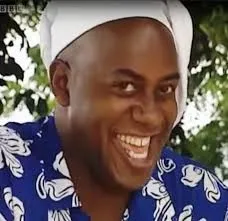

In [ ]:
import gradio as gr
llm = ChatGroq(
    temperature=0,
    model= "llama-3.3-70b-versatile",#"llama-3.1-70b-versatile", #"llama3-70b-8192",
    api_key= GROQ_API_KEY,
)

def predict(query):
  docs = vector_store.similarity_search(query)
  retreived_docs = [doc.page_content for doc in docs]
  chunks_formatted = "\n\n".join(retreived_docs)
  # format the prompt

  prompt_f = prompt.format(chunks_formatted=chunks_formatted, query=query)
  answer = llm.predict(prompt_f)
  return answer


gr.Interface( fn = predict , inputs = "text", outputs = "text").launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f1b27b7d9f4b6ac58.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
